<a href="https://colab.research.google.com/github/mcucii/TextToImageGeneration_StackGAN/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/RIProject')

In [3]:
import config as cfg
from dataset import TextImageDataset
from stage1 import GANTrainer_stage1
from stage2 import GANTrainer_stage2

In [4]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch

In [5]:
class Args:
    train = 'y'
    stage = 1

if Args.stage == 1:
    cfg.IMG_SIZE = 64
    cfg.NET_G = ''
    cfg.NET_D = ''
    cfg.GAN_GF_DIM = 192
else:
    cfg.IMG_SIZE = 256
    cfg.GAN_GF_DIM = 256
    cfg.STAGE1_G = "data_reduced_20/birds/Model_stage1/netG_epoch_200.pth"
    cfg.STAGE1_D = "data_reduced_20/birds/Model_stage1/netD_epoch_200.pth"

# ova dva u kombinaciji OK
cfg.TRAIN_DISCRIMINATOR_LR = 0.00002
cfg.TRAIN_GENERATOR_LR = 0.0005


cfg.STAGE = Args.stage

if Args.train == "y":
    cfg.TRAIN = True
else:
    cfg.NET_G = "../data_reduced_20/birds/Model_stage2/netG_epoch_200.pth"
    cfg.NET_D = "../data_reduced_20/birds/Model_stage2/netD_epoch_200.pth"
    cfg.TRAIN = False

if torch.cuda.is_available():
  cfg.DEVICE = 'cuda'
else:
  cfg.DEVICE = 'cpu'

output_dir = '../output/birds'

In [6]:
def train():
  image_transform = transforms.Compose([
      transforms.RandomResizedCrop(cfg.IMG_SIZE),  # Randomly crop and resize the image
      transforms.RandomHorizontalFlip(),         # Randomly flip the image horizontally
      transforms.ColorJitter(),                  # Randomly adjust brightness, contrast, saturation, and hue
      transforms.ToTensor(),                     # Convert the image to a PyTorch tensor
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the image
  ])

  image_transform2 = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.1),  # Minimalna šansa za horizontalno ogledanje slike
    transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.05, hue=0.02),  # Vrlo mala promena osvetljenosti, kontrasta, saturacije i nijanse
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # Normalizacija slike
  ])

  image_transform3 = transforms.Compose([
            transforms.RandomCrop(cfg.IMG_SIZE),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])

  dataset = TextImageDataset(cfg.DATA_DIR, 'train', input_transform=None)
  dataset_size = len(dataset)
  print(f"Veličina skupa podataka: {dataset_size}")

  dataloader = DataLoader(dataset, batch_size=cfg.TRAIN_BATCH_SIZE, drop_last=True, shuffle=False, num_workers=2)
  batch_size = dataloader.batch_size
  print(f"Veličina batch-a: {batch_size}")

  num_batches_per_epoch = len(dataloader)
  print(f"Broj batch-eva po epohi: {num_batches_per_epoch}")

  if Args.stage == 1:
    trainer = GANTrainer_stage1(output_dir)
  else:
    trainer = GANTrainer_stage2(output_dir)

  trainer.train(dataloader)

In [7]:
def test():
  # TODO
  pass

In [8]:
def main():

  if Args.train == 0:
    cfg.TRAIN = False  # True by default (train)
    # todo: test
    #cfg.NET_G = "?"  # NET_G -> pre-trained model:
  else:
    cfg.TRAIN = True

  if Args.stage == 1:
    cfg.IMG_SIZE = 64
    cfg.STAGE = 1
  else :
    cfg.IMG_SIZE = 256
    cfg.STAGE = 2

  output_dir = '../output/birds'


  if cfg.TRAIN:
    train()
  # else:
  #   test()


Veličina skupa podataka: 60
Veličina batch-a: 32
Broj batch-eva po epohi: 1
Epoch [0/100], Step [0/1], Generator Loss: 2.2779428958892822, Discriminator Loss: 2.843367099761963
('this gray bird has a white crown and a long but blunted beak.', 'the bird has a rustic appearance due to its variegated shades of brown throughout its exterior, it also has a beak that droops down at the tip', 'this grey bird has a large wingspan with a white ring of feathers around its bill.', 'this bird is nearly all gray with a long hooked bill.', 'this is a grey bird with dark wings and a large beak.', 'a gray bird with a long gray bill that curves downward at the end is flying over the ocean.', 'a large brown bird with almost no tail, with a long sharply rounded bill.', 'this is a large grey bird with a large grey beak.', 'this bird has very wide-reacing wingbars and secondaries. the breast is white and it has a dark yellow bill.', 'this bird is brown with black and has a long, pointy beak.', 'the bird ha

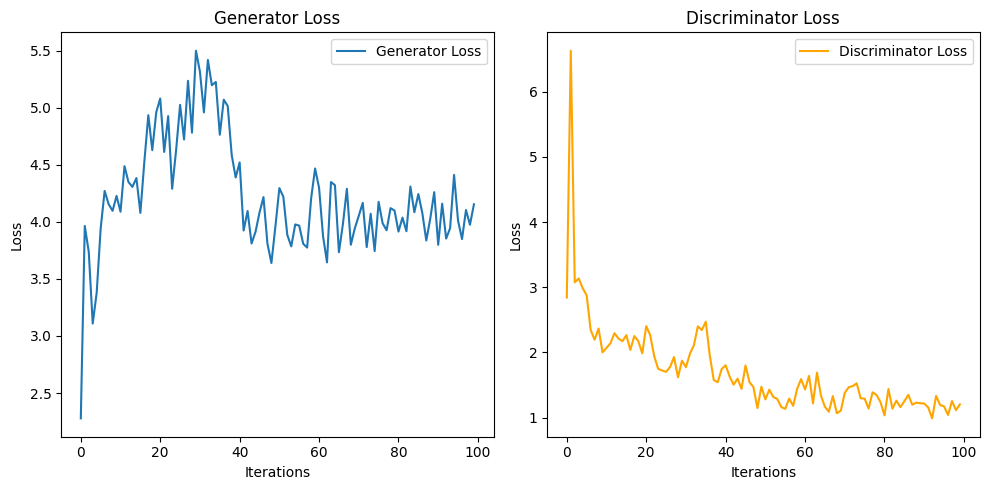

In [9]:
main()